# [항공사 고객 데이터 AI 모델링] - Satisfaction 여부 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
df['Arrival Delay in Minutes'].mean()

15.09112883918849

## **전처리**

In [8]:
# 'Arrival Delay in Minutes' (도착 지연시간) 결측치 -> 평균값 으로 대체
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [9]:
df['Arrival Delay in Minutes'].to_frame()

,Arrival Delay in Minutes
0,0.0
1,305.0
2,0.0
3,0.0
4,0.0
...,...
129875,0.0
129876,172.0
129877,163.0
129878,205.0


In [10]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

결측치 모두 제거됨

In [11]:
# object type 변경
df.select_dtypes(object)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,Personal Travel,Eco
129876,dissatisfied,Male,disloyal Customer,Personal Travel,Business
129877,dissatisfied,Male,disloyal Customer,Personal Travel,Eco
129878,dissatisfied,Male,disloyal Customer,Personal Travel,Eco


In [12]:
df[df.select_dtypes(object).columns] = df[df.select_dtypes(object).columns].astype(str)

'satisfaction' 범주형 -> 수치형

In [13]:
df['satisfaction'].replace(['satisfied', 'dissatisfied'], [1, 0], inplace=True)

In [14]:
''' # << LabelEncoder >>
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction']) '''

" # << LabelEncoder >>\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf['satisfaction'] = le.fit_transform(df['satisfaction']) "

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [16]:
df['satisfaction'].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

'Class' 정수형 인코딩

In [17]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [18]:
df['Class'].replace(['Business', 'Eco', 'Eco Plus'], [0, 1, 2], inplace=True)

In [19]:
df['Class'].value_counts()

0    62160
1    58309
2     9411
Name: Class, dtype: int64

'Gender', 'Customer Type', 'Type of Travel' : 원핫 인코딩

In [20]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel']
df = pd.get_dummies(df, columns = cat_cols)

In [21]:
df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,2,0,0.0,1,0,1,0,0,1
1,1,47,0,2464,0,0,0,3,0,2,...,3,2,310,305.0,0,1,1,0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,4,2,0,0.0,1,0,1,0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,3,0,0.0,1,0,1,0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,5,0,0.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1,1731,5,5,5,3,2,5,...,4,2,0,0.0,1,0,0,1,0,1
129876,0,63,0,2087,2,3,2,4,2,1,...,2,1,174,172.0,0,1,0,1,0,1
129877,0,69,1,2320,3,0,3,3,3,2,...,3,2,155,163.0,0,1,0,1,0,1
129878,0,66,1,2450,3,2,3,2,3,2,...,1,2,193,205.0,0,1,0,1,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Class                              129880 non-null  int64  
 3   Flight Distance                    129880 non-null  int64  
 4   Seat comfort                       129880 non-null  int64  
 5   Departure/Arrival time convenient  129880 non-null  int64  
 6   Food and drink                     129880 non-null  int64  
 7   Gate location                      129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Inflight entertainment             129880 non-null  int64  
 10  Online support                     129880 non-null  int64  
 11  Ease of Online booking             1298

## **머신 러닝**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train.shape, y_train.shape

((103904, 25), (103904,))

데이터 스케일링

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **딥 러닝**

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(25,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1, restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1, callbacks=[early_stop])

Epoch 1/100
812/812 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.8879 - val_loss: 0.1854 - val_accuracy: 0.9217
Epoch 2/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1799 - accuracy: 0.9234 - val_loss: 0.1670 - val_accuracy: 0.9292
Epoch 3/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1577 - accuracy: 0.9323 - val_loss: 0.1405 - val_accuracy: 0.9384
Epoch 4/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1448 - accuracy: 0.9381 - val_loss: 0.1355 - val_accuracy: 0.9407
Epoch 5/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1367 - accuracy: 0.9415 - val_loss: 0.1330 - val_accuracy: 0.9425
Epoch 6/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1321 - accuracy: 0.9427 - val_loss: 0.1220 - val_accuracy: 0.9464
Epoch 7/100
812/812 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9463 - val_loss: 0.1212 - val_accuracy: 0.9463

'val_loss' : epoch 33 일때 최소

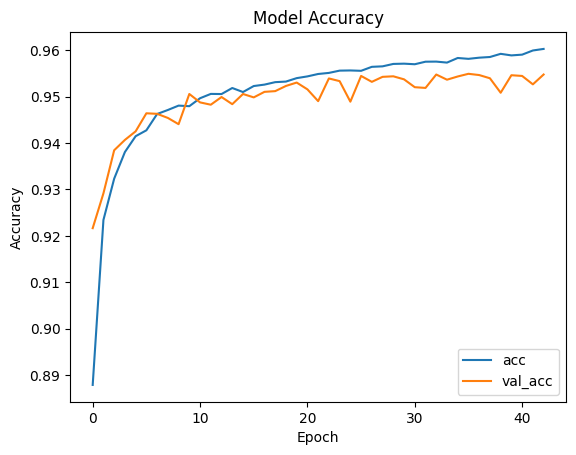

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

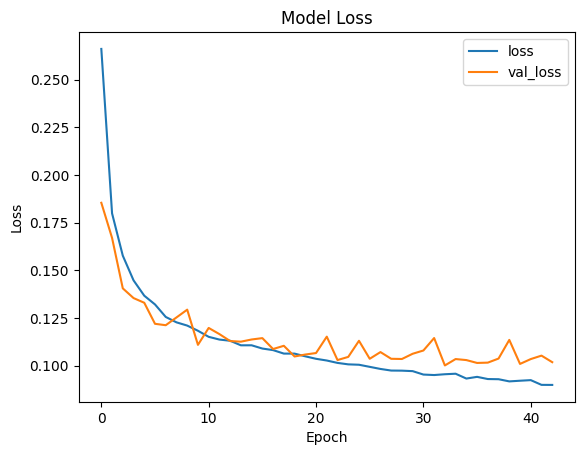

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()